In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
data = pd.read_csv("car data.csv")

In [127]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [69]:
data.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [70]:
print(data["Seller_Type"].unique())
print(data["Fuel_Type"].unique())
print(data["Seller_Type"].unique())
print(data["Owner"].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
[0 1 3]


In [71]:
data["Car_Name"].nunique()

98

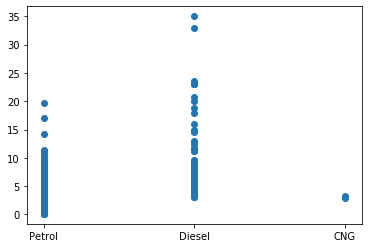

In [72]:
plt.scatter(data["Fuel_Type"], data["Selling_Price"])

In [73]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [74]:
data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [75]:
data["No_Year"] = 2020 - data["Year"]

In [76]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


In [77]:
data.drop(['Car_Name', 'Year'], axis = 1, inplace = True)

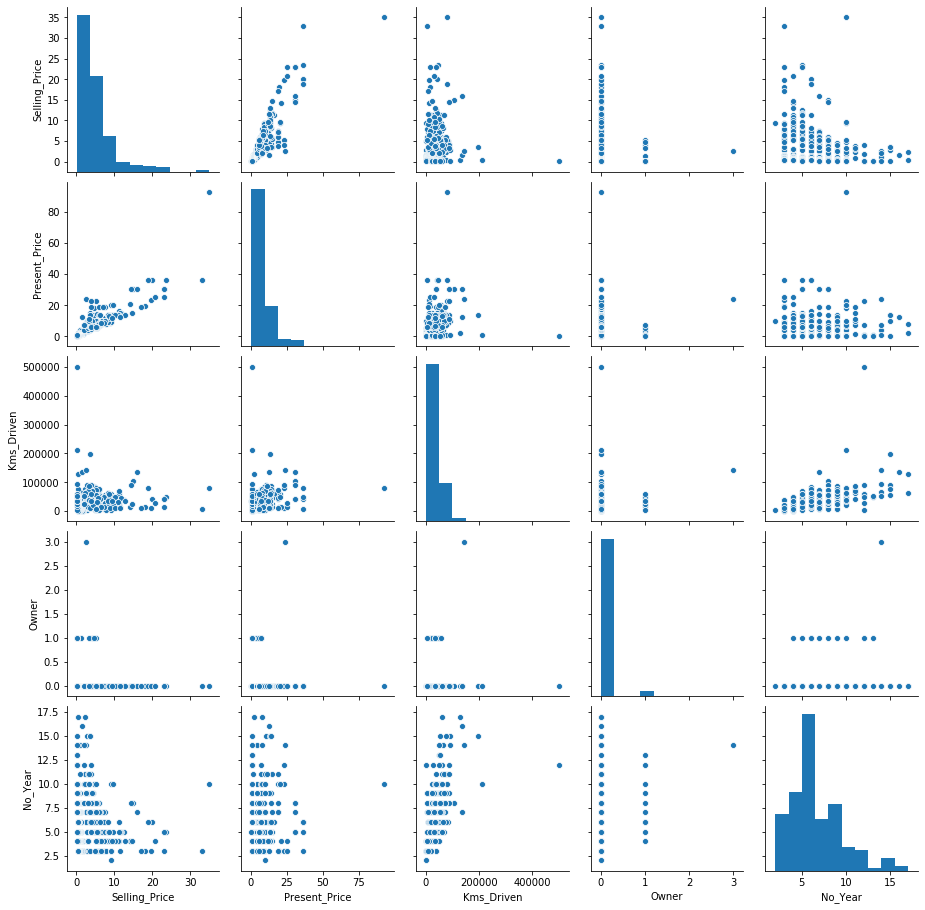

In [78]:
sns.pairplot(data)

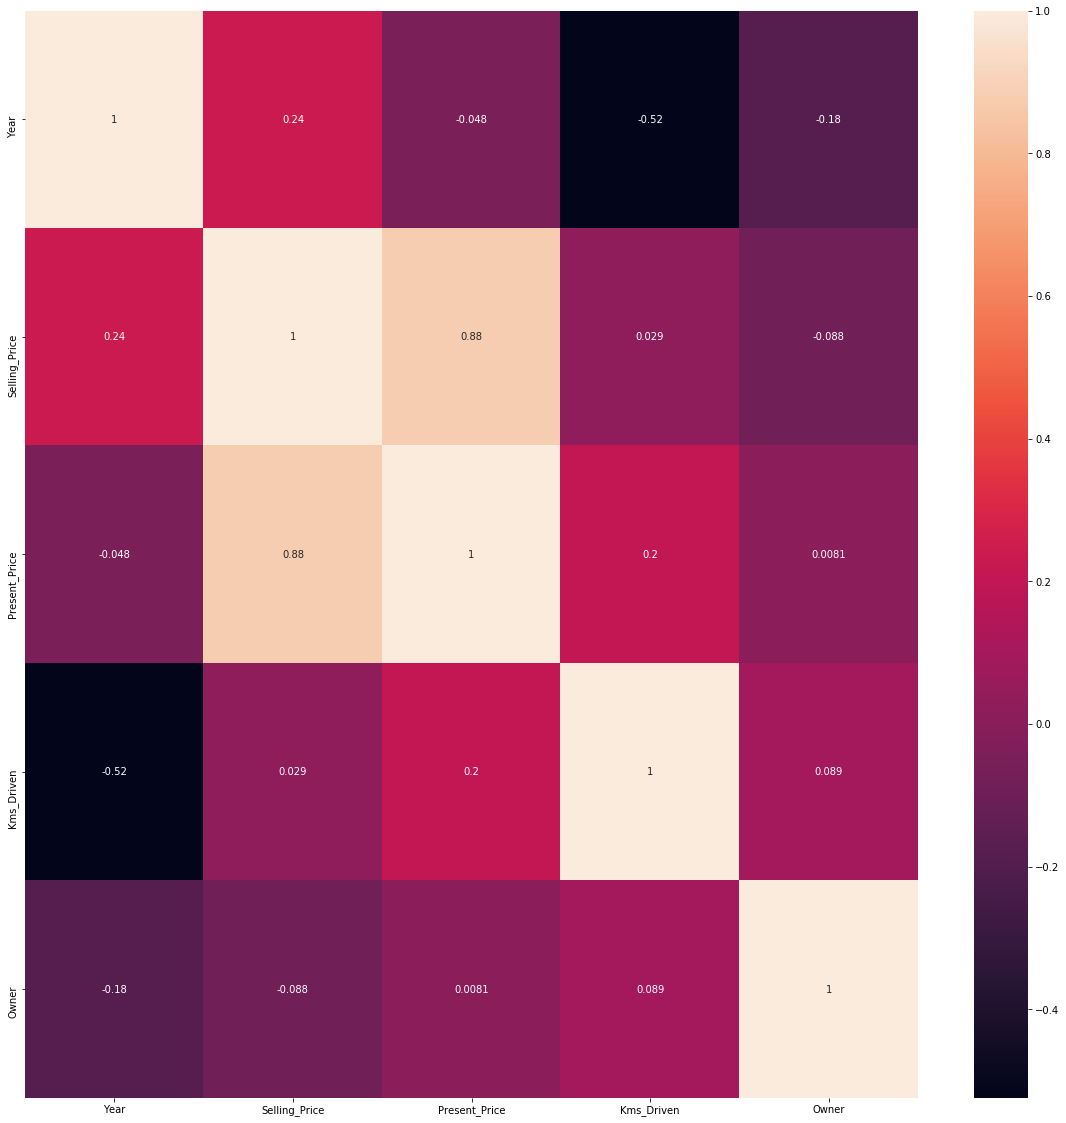

In [129]:
plt.figure(figsize=(20,20))

sns.heatmap(data.corr(), annot=True)

In [81]:
y = data["Selling_Price"]
data.drop(["Selling_Price"], axis = 1, inplace = True)
x = data

In [84]:
x = pd.get_dummies(x, drop_first = True)

In [87]:
x.head()

,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


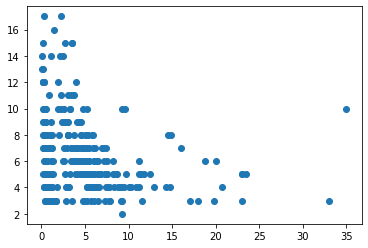

In [32]:
plt.scatter(data["Selling_Price"], data["No_Year"])

In [88]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0) 

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [98]:
model_param = {

    'random_forest':{
        'model': RandomForestRegressor(),
        'params':{
            'n_estimators':[100,300,500,700]
        }
    },
    'decision_Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'max_depth':[5,10,20]
        }
    }
    
}

In [99]:
model_param

{'random_forest': {'model': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=None, oob_score=False,
                        random_state=None, verbose=0, warm_start=False),
  'params': {'n_estimators': [100, 300, 500, 700]}},
 'decision_Tree': {'model': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random

In [107]:

# grid search crossvalidation

scores = []

for mn, mp in model_param.items():
    model = GridSearchCV(mp['model'], mp['params'],cv = 5, return_train_score = False, verbose = 0)
    model.fit(X_train,y_train)
    scores.append({
        'model':mp['model'],
        'best_score':model.best_score_,
        'best_params':model.best_params_
    })

In [108]:
best_param = pd.DataFrame(scores)
best_param

,model,best_score,best_params
0,"RandomForestRegressor(bootstrap=True, ccp_alph...",0.924782,{'n_estimators': 100}
1,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",0.909181,{'max_depth': 10}


In [112]:
model = RandomForestRegressor(n_estimators = 100)

In [113]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [117]:
y_pred = model.predict(X_test)

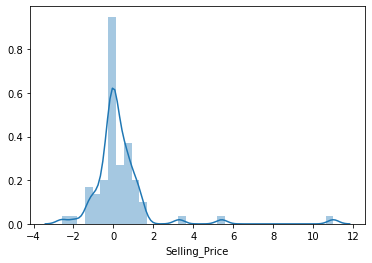

In [118]:
sns.distplot(y_test-y_pred)

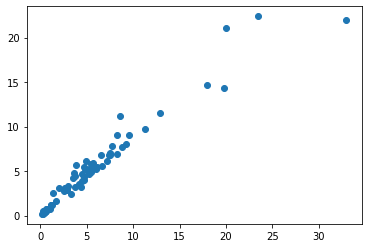

In [119]:
plt.scatter(y_test, pred)

In [120]:
from sklearn import metrics

In [124]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 1.626632448779088


In [125]:
import pickle

file = open('model.pkl', 'wb')
pickle.dump(model, file)